In [1]:

# Questions to ask in this module:
# 1. Do you know if the dealer is offering fair value for my trade-in?
# 2. Do i know if i put a fair value on my car?


In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
def download(url,filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print("request granted")
        print(f"The {filename} has been loaded")

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
filename = "usedcars.csv"
download(url,filename)

request granted
The usedcars.csv has been loaded


In [4]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:

# 1. Linear Regreesion and Multiple Linear Regression


In [6]:
# SIMPLE LINEAR REGRESSION (SLR)

In [7]:
# loads the modules for linear regression:
from sklearn.linear_model import LinearRegression

In [8]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [9]:

# How could 'highway-mpg' help us predict car price?

# Create a linear function with 'highway-mpg' as the predictor variable and the 'price' as the response variable

X = df[['highway-mpg']]
Y = df['price']


In [10]:

# Fit the linear model using highway-mpg:

lm.fit(X,Y)

LinearRegression()

In [11]:
# We can ouput a prediction:

Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:

# What is the value of the intercept (a) or (bo)

lm.intercept_

38423.3058581574

In [13]:

# What is the value of the slop (b)

lm.coef_


array([-821.73337832])

In [14]:
#  WHAT IS THE FINAL ESTIMATED LINEAR MODEL WE GET?

# We are suppose to get a final linear model with the structure:

# Yhat = a + bX

# Plugging in the values we have, we get:
# Price = 38423.31 - 821.73 * highway-mpg


In [15]:

# Q1. a) Create a linear regression object called 'lm1'.
lm1 = LinearRegression()
lm1

LinearRegression()

In [16]:

# Q1. b) Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable:

# fit the model
lm1.fit(df[['engine-size']], df['price'])
lm1

LinearRegression()

In [17]:

# Q1. c) Find the slope and intercept of the model


In [18]:
# Slope:
lm1.coef_

array([166.86001569])

In [19]:
# intercept:
lm1.intercept_

-7963.338906281046

In [20]:

# Q1. d) What is the equation of the predicted line? Use x and yhat or 'engine-size' or 'price'

Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [21]:

# MULTIPLE LINEAR REGRESSION (MLR)


In [22]:

#The equation is given by:
# Yhat = a + b1X1 + b2X2 + b3X3 + b4X2


In [23]:
 
# Other good predictors of price are:
# Horsepower, Curb-weight, Engine-size and Highway-mpg


In [24]:
# to develop a model using these variables as the predictor variables:

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [25]:

# Fit the linear model using the four above-mentioned variables.

lm.fit(Z, df['price'])

LinearRegression()

In [26]:

# value of intercept(a)?
lm.intercept_

-15806.624626329194

In [27]:
# value of slope(b1, b2, b3, b4)?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [28]:

# Yhat = -15806.62 + 53.50*X1 + 4.71*X2 + 81.53*X3 + 36.06X4

# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [29]:

# Q2. a) Create and train multiple linear regression model 'lm2' where the response variable is 'price', and the predictor variable is 'normalized-losses' and 'highway-mpg':

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])


LinearRegression()

In [30]:

# Q2 b) Find the coefficient of the model
lm2.coef_

array([   1.49789586, -820.45434016])

In [31]:


# MODEL EVALUATION USING VISUALIZATION

# Now that we've developed some models, how do we evaluate our models and choose the best one?
# One way to do this is by using a visualization.



In [32]:
# import seaborn as sns
# %matplotlib inline

In [33]:

# REGRESSION PLOT



(0.0, 48184.884912875736)

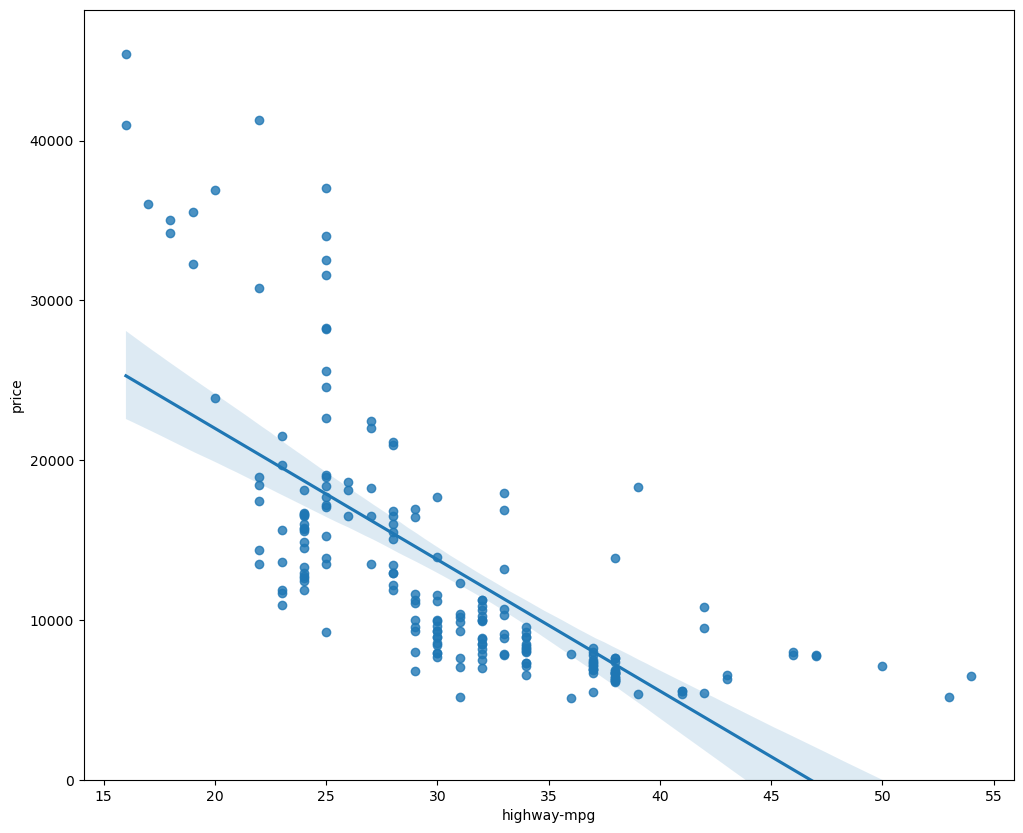

In [34]:
# Visualize highway-mpg as potential predictor variable of price:

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data =df)
plt.ylim(0,)


(0.0, 47414.1)

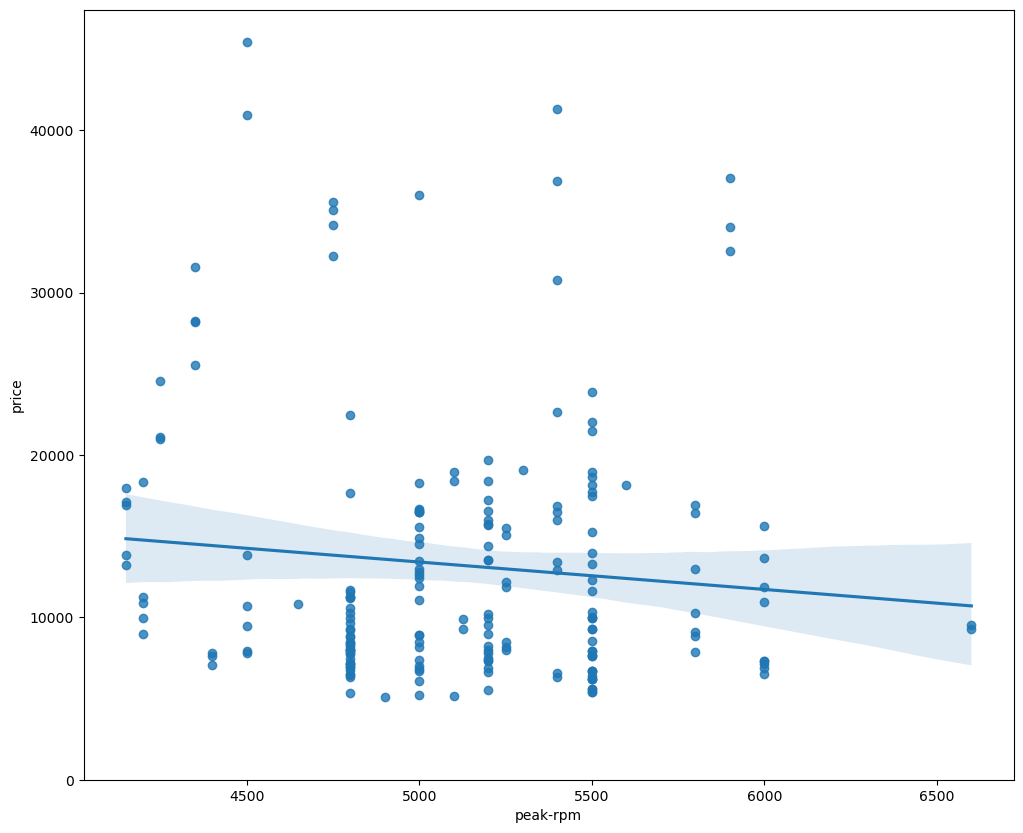

In [35]:
# Compare the above plot to the regression plot of 'peak-rpm'
plt.figure(figsize = (width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)


In [36]:

# Q3. Given the regression plots above, is "peak-rpm' or 'highway-mpg' more strongly correlated with 'price'?
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [37]:
# Highway-mpg is more strongly correlated with price than peak-rpm

In [38]:


# RESIDUAL PLOT

# If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.
#Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.


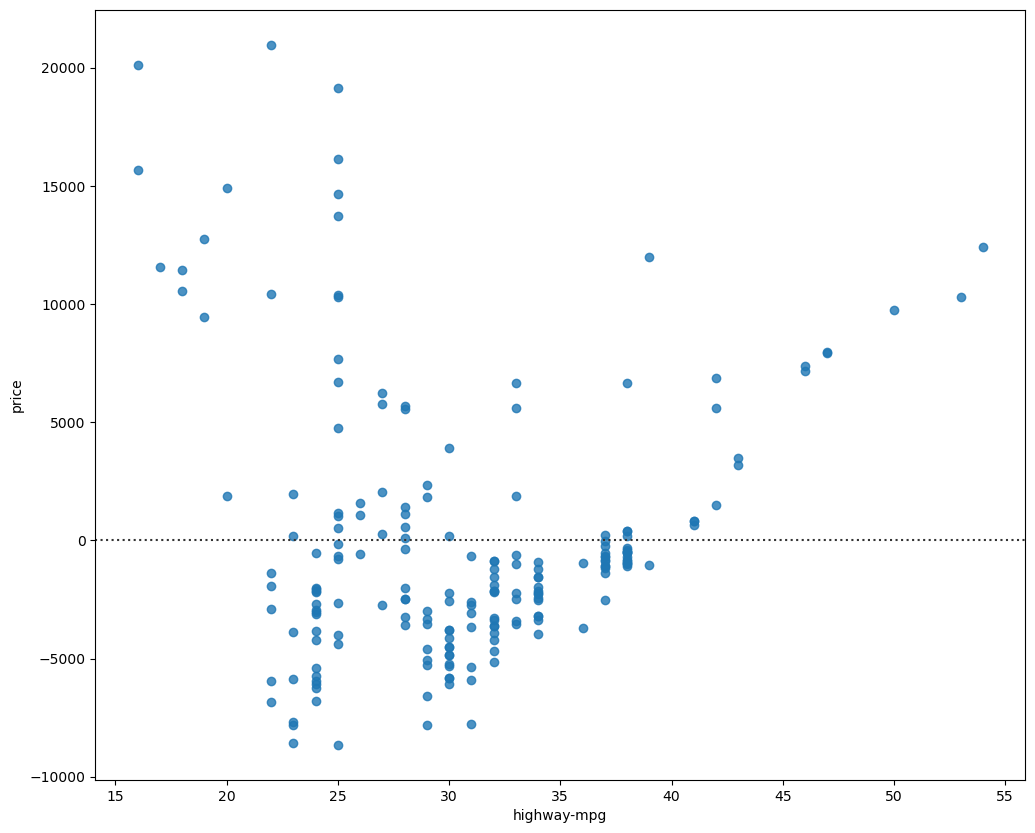

In [39]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [40]:
# From the above plot, the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropraite for this data.

In [41]:

# Multiple Linear Regression
# One way to look at the fit of the model is by looking at the distribution plot.
# We can look at the distribution of the fiited values that result from the model and compare it to the distribution of the actual values.


In [42]:
# lets make a prediction:
Y_hat = lm.predict(Z)

C:\Users\user\AppData\Local\Temp\ipykernel_1004\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\user\AppData\Local\Temp\ipykernel_1004\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

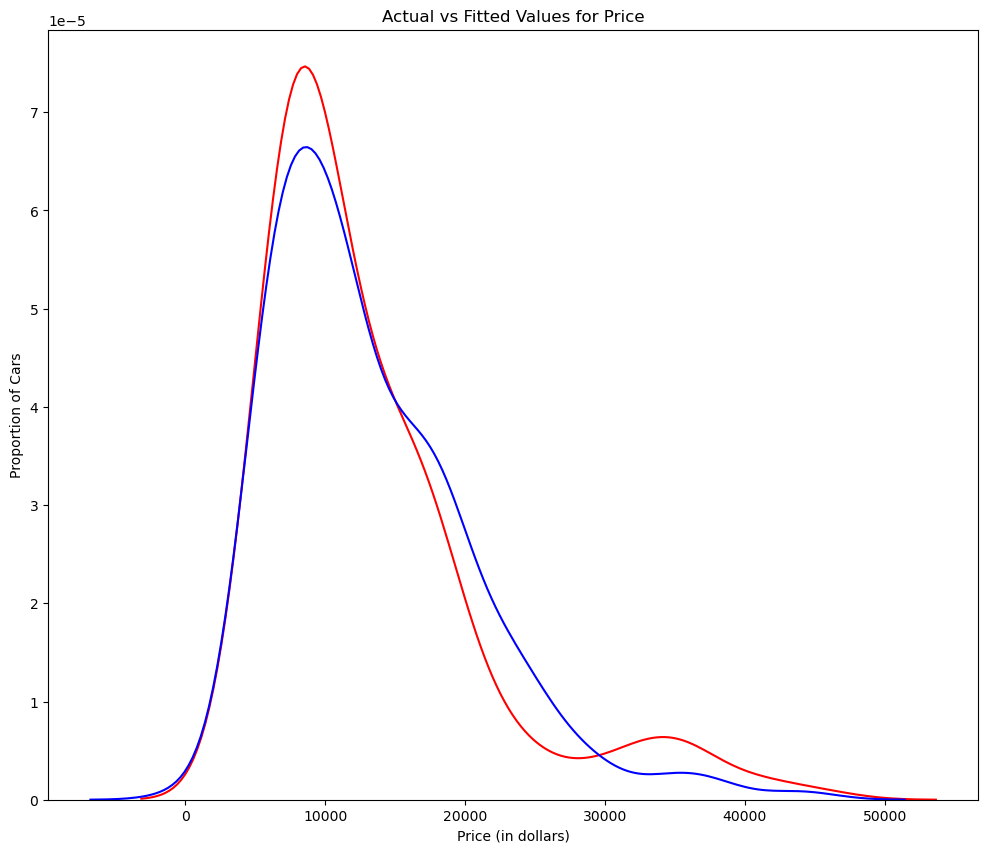

In [43]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [44]:
# We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit.
# However, there is definitely some room for improvement.

In [45]:


# POLYNOMIAL REGRESSION AND PIPELINES



In [46]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Lenth')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()
    

In [47]:

# Let's get the variables:
x = df['highway-mpg']
y = df['price']

In [48]:

# Fit the polynomial using the function 'polyfit', then use the function 'poly1d' to display the polynomial function

# Use a polynomial of the 3rd order (cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


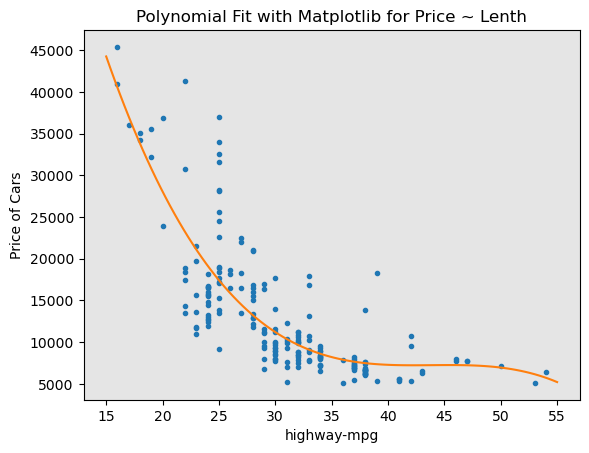

In [49]:
# plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [50]:

# We can already see from plotting that this polynomial model performs better than the linear model.
# This is because the generated polynomial function 'hits' more of the data points.


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


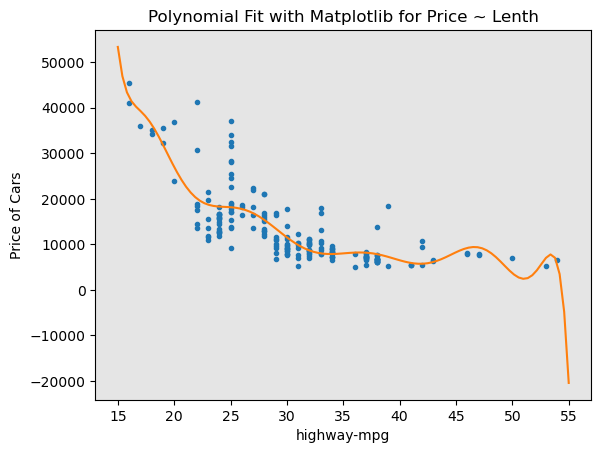

In [51]:

# Q4. Create 11 order polynomial model with the variables x and y from above;
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'highway-mpg')

In [52]:

# Performing a polynomial transform on multiple features. 
# Lets import the module first:
from sklearn.preprocessing import PolynomialFeatures


In [53]:

# Creating a PolynomialFeatures object of degree 2:

pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [54]:
Z_pr = pr.fit_transform(Z)

In [55]:
# In the original data, there are 201 samples and 4 features:
Z.shape

(201, 4)

In [56]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

In [57]:

# PIPELINE

# Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [58]:
# The pipeline is created by creating a list of tuples including the name 
# of the model or estimator and its corresponding constructor.

Input =[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]


In [59]:
# Input the list as an argument to othe pipeline constructor:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [60]:

# Converts the data type Z to type float to avoid conversion warnings that may appear as a result of 
# StandardScaler taking float inputs.

# Then we normalize the data, perform a tranform and fit the model simultaneously.


In [61]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [63]:

# Q5. Create a pipeline that standardizes the data, then produce a 
# prediction using a linear regression model using the features Z and target y.


In [64]:
Input = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(Z,y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [65]:


# MEASURES FOR IN-SAMPLE EVALUATION

# Two very important measures that are often used in Statistics to determine the accuracy of a model are:

# R^2 / R-squeared
# Mean Squared Error (MSE)


In [66]:

# MODEL 1: SLR

# Calculate the R^2:
lm.fit(X,Y)  #highway_mpg_fit

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [67]:
# We can say that 49.659% fo the variation of the price is explained
# by this simple linear model 'horsepower-fit'.

In [68]:

# Calculate the MSE:

# We can predict the output i.e. 'yhat' usng the predict method, where X is the input Variable:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])


The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [69]:
# import the function 'mean_squared_error' from the module 'metrics':

from sklearn.metrics import mean_squared_error

In [70]:
mse = mean_squared_error(df['price'], Yhat)
print(' The mean square erro of price and predicted value is: ', mse)

 The mean square erro of price and predicted value is:  31635042.944639888


In [71]:


#   MODEL 2: MLR



In [72]:

# Calculate the R ^ 2

# fit the model
lm.fit(Z, df['price'])

# Find R^2
print('The R-squeare is: ', lm.score(Z, df['price']))

The R-squeare is:  0.8093562806577457


In [73]:
# Prediction:
Y_predict_multifit = lm.predict(Z)

In [74]:
# Compare the predicted results with teh actual results:

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [75]:

# MODEL 3: POLYNOMIAL FIT


In [76]:
# Calculate R^2

# import the function r2_score form the module metrics as we are using a different function.
from sklearn.metrics import r2_score

In [77]:
# apply the function to get R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [78]:

# MSE
mean_squared_error(df['price'], p(x))


20474146.426361207

In [79]:


# PREDICTION AND DECISION MAKING



In [81]:
# PREDICTION:

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [82]:
 # Create a new input

new_input = np.arange(1,100,1).reshape(-1,1)

In [83]:
 # fit the model:
lm.fit(X,Y)
lm

LinearRegression()

In [84]:
# produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

C:\Users\user\anaconda3\Anaconda3 folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

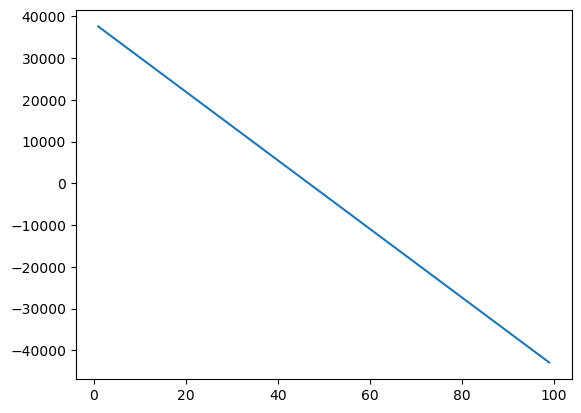

In [85]:
plt.plot(new_input, yhat)
plt.show()